In [1]:
import numpy as np; np.random.seed(22)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import calmap

# fig = plt.figure(figsize=(18, 18))
%matplotlib inline

In [2]:
# Print the overview of dataframe
def print_overview(dataframe):
    print('Shape: ', dataframe.shape, '\n')
    print(dataframe.info())

# Print the head and tail of dataframe
def print_head_tail(dataframe):
    df = dataframe.head(5)
    df = df.append(dataframe.tail(5))
    return df

# Return dataframe sorted by descending Date,Time features
def sort_features(dataframe, features=['Date','Time'], order=[False]*2):
    df = dataframe.sort_values(by=features, ascending=order)
    return df

# Return dataframe of duplicates in specified feature
def duplicates_overview(dataframe, feature='TweetID'):
    return dataframe[dataframe.duplicated(feature, keep=False)]

# Return dataframe with dropped duplicates in specified feature
def drop_duplicated_feature(dataframe, feature='TweetID'):
    df = dataframe.copy()
    df = sort_features(df, [feature,'Date','Time','Likes'], [False]*4)
    df.drop_duplicates(feature, keep='first', inplace=True)
    return df

# Return dataframe with Date as index
def create_time_series(dataframe, feature='Date'):
    df = dataframe.copy()
    if isinstance(df.index, pd.DatetimeIndex):
        return df
    else:
        df.Date = pd.to_datetime(df[feature])
        df.set_index(feature, inplace=True)
        df.sort_index(inplace=True)
        return df

# Trump data
#### Define standard title for columns

In [3]:
title = ['TweetID','Date','Time','Timezone','Username','Content','Replies','Retweets','Likes','Hashtags']

In [4]:
trump_raw = pd.read_csv('trumpRaw.csv', sep='|', header=None, names=title)
print_overview(trump_raw)

Shape:  (33923, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33923 entries, 0 to 33922
Data columns (total 10 columns):
TweetID     33923 non-null int64
Date        33923 non-null object
Time        33923 non-null object
Timezone    33923 non-null object
Username    33923 non-null object
Content     33923 non-null object
Replies     33923 non-null int64
Retweets    33923 non-null int64
Likes       33923 non-null int64
Hashtags    5303 non-null object
dtypes: int64(4), object(6)
memory usage: 2.6+ MB
None


In [5]:
# overview
print_head_tail(trump_raw)

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags
0,980065427375128576,2018-03-31,12:53:01,GMT,realDonaldTrump,Governor Jerry “Moonbeam” Brown pardoned 5 cri...,30779,26454,75544,NaN
1,980065419632566272,2018-03-31,12:52:59,GMT,realDonaldTrump,"...does not include the Fake Washington Post, ...",25802,18115,68334,NaN
2,980063581592047617,2018-03-31,12:45:41,GMT,realDonaldTrump,"While we are on the subject, it is reported th...",20847,17688,63761,NaN
3,979816766904954880,2018-03-30,20:24:56,GMT,realDonaldTrump,pic.twitter.com/UM3YJ6lUiD,17200,22872,76699,NaN
4,979449770640015361,2018-03-29,20:06:37,GMT,realDonaldTrump,Washington spent trillions building up foreign...,23214,24985,96113,NaN
33918,1773561338,2009-05-12,14:07:28,GMT,realDonaldTrump,"""My persona will never be that of a wallflower...",90,1485,1950,NaN
33919,1741160716,2009-05-08,20:40:15,GMT,realDonaldTrump,New Blog Post: Celebrity Apprentice Finale and...,9,10,30,NaN
33920,1737479987,2009-05-08,13:38:08,GMT,realDonaldTrump,Donald Trump reads Top Ten Financial Tips on L...,5,10,10,NaN
33921,1701461182,2009-05-04,01:00:10,GMT,realDonaldTrump,Donald Trump will be appearing on The View tom...,26,35,318,NaN
33922,1698308935,2009-05-04,18:54:25,GMT,realDonaldTrump,Be sure to tune in and watch Donald Trump on L...,145,499,689,NaN


In [6]:
# check for duplicates
duplicates_overview(trump_raw)

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags


In [7]:
# drop duplicates
trump_raw = trump_raw.drop_duplicates()
print_overview(trump_raw)

Shape:  (33923, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33923 entries, 0 to 33922
Data columns (total 10 columns):
TweetID     33923 non-null int64
Date        33923 non-null object
Time        33923 non-null object
Timezone    33923 non-null object
Username    33923 non-null object
Content     33923 non-null object
Replies     33923 non-null int64
Retweets    33923 non-null int64
Likes       33923 non-null int64
Hashtags    5303 non-null object
dtypes: int64(4), object(6)
memory usage: 2.8+ MB
None


In [8]:
sort_features(duplicates_overview(trump_raw))

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags


In [9]:
trump_raw.to_csv('trump.csv', index=False, sep='|')

In [10]:
trump = pd.read_csv('trump.csv', sep='|')
print_overview(trump)

Shape:  (33925, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33925 entries, 0 to 33924
Data columns (total 10 columns):
TweetID     33925 non-null object
Date        33925 non-null object
Time        33925 non-null object
Timezone    33925 non-null object
Username    33924 non-null object
Content     33923 non-null object
Replies     33921 non-null float64
Retweets    33921 non-null float64
Likes       33921 non-null float64
Hashtags    5302 non-null object
dtypes: float64(3), object(7)
memory usage: 2.6+ MB
None


Something wrong here, there are more rows here

In [11]:
pd.set_option('display.max_colwidth', -1)
trump[trump.iloc[:,0:9].isnull().any(axis=1)]

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags
33410,115846232714391552,2011-09-19,17:54:28,GMT,realDonaldTrump,My interview which recently aired on CNBC's Squawk Box http://video.cnbc.com/gallery/?video=3000045806 …,NaN,NaN,NaN,NaN
33411,My in… (cont) http://deck.ly/~7pCGe,11,19,7,NaN,NaN,NaN,NaN,NaN,NaN
33534,101013255950053376,2011-08-09,19:33:31,GMT,realDonaldTrump,http://goo.gl/AMNEE Countdown to @AmericaNowRadio as my former,NaN,NaN,NaN,NaN
33535,#Apprentice Andy and I talk about politics an… (cont) http://deck.ly/~9Q2fk,15,21,4,#Apprentice,NaN,NaN,NaN,NaN,NaN


In [12]:
pd.set_option('display.max_colwidth', -1)
trump_raw.loc[trump_raw['TweetID'] == 115846232714391552]

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags
33410,115846232714391552,2011-09-19,17:54:28,GMT,realDonaldTrump,My interview which recently aired on CNBC's Squawk Box http://video.cnbc.com/gallery/?video=3000045806 …\rMy in… (cont) http://deck.ly/~7pCGe,11,19,7,NaN


In [13]:
pd.set_option('display.max_colwidth', -1)
trump_raw.loc[trump_raw['TweetID'] == 101013255950053376]

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags
33533,101013255950053376,2011-08-09,19:33:31,GMT,realDonaldTrump,http://goo.gl/AMNEE Countdown to @AmericaNowRadio as my former\r#Apprentice Andy and I talk about politics an… (cont) http://deck.ly/~9Q2fk,15,21,4,#Apprentice


In [14]:
pd.reset_option('^display.', silent=True)

Fix: https://stackoverflow.com/questions/39217629/problems-with-special-characters-r-when-writing-and-reading-csv-files

In [15]:
trump = pd.read_csv('trump.csv', sep='|', lineterminator='\n')
print_overview(trump)

Shape:  (33923, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33923 entries, 0 to 33922
Data columns (total 10 columns):
TweetID     33923 non-null int64
Date        33923 non-null object
Time        33923 non-null object
Timezone    33923 non-null object
Username    33923 non-null object
Content     33923 non-null object
Replies     33923 non-null int64
Retweets    33923 non-null int64
Likes       33923 non-null int64
Hashtags    5303 non-null object
dtypes: int64(4), object(6)
memory usage: 2.6+ MB
None


#### There are no duplicates, Trump data is all set
---

# Obama data
#### Obama twitter is interesting, I can't scrape his data properly like other accounts
Here I will concatenate data before cleansing
1. Obama twitter contains around **15k tweets**, since there are more rows here, there must be duplicates
2. By inspecting, we see that the **first 2 rows** of `obama_from_2012.head()` has same Date and Time, but the **2nd row is the latest row, we need to sort by both columns and index**

In [16]:
# Obama_before_2012 data contain his tweets before 2012
obama_before_2012 = pd.read_csv('obamaRaw2012.csv', sep='|', header=None, names=title)
# All Obama data (interestingly don't contains tweets before 2012)
obama_from_2012 = pd.read_csv('obamaRaw.csv', sep='|', header=None, names=title)
obama_raw = pd.concat([obama_before_2012, obama_from_2012])
print_overview(obama_raw)

Shape:  (9093, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 6787
Data columns (total 10 columns):
TweetID     9093 non-null int64
Date        9093 non-null object
Time        9093 non-null object
Timezone    9093 non-null object
Username    9093 non-null object
Content     9093 non-null object
Replies     9093 non-null int64
Retweets    9093 non-null int64
Likes       9093 non-null int64
Hashtags    4395 non-null object
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None


In [17]:
obama_raw.drop_duplicates(inplace=True)
print_overview(obama_raw)

Shape:  (9093, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 6787
Data columns (total 10 columns):
TweetID     9093 non-null int64
Date        9093 non-null object
Time        9093 non-null object
Timezone    9093 non-null object
Username    9093 non-null object
Content     9093 non-null object
Replies     9093 non-null int64
Retweets    9093 non-null int64
Likes       9093 non-null int64
Hashtags    4395 non-null object
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None


In [18]:
obama_raw = sort_features(obama_raw)
print_head_tail(obama_raw)

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags
0,977931743880761344,2018-03-25,15:34:31,GMT,BarackObama,Incredible to have a Chicago team in the Final...,3762,19770,217482,NaN
1,977592827348742146,2018-03-24,17:07:47,GMT,BarackObama,Michelle and I are so inspired by all the youn...,24583,326934,1571139,NaN
2,975851480648421376,2018-03-19,21:48:18,GMT,BarackObama,Our most important task as a nation is to make...,3970,27109,136296,NaN
3,975751255296487424,2018-03-19,15:10:02,GMT,BarackObama,In Singapore with young people who are advocat...,2857,26423,173047,NaN
5,974424008182689792,2018-03-15,23:16:02,GMT,BarackObama,Congrats to @LoyolaChicago and Sister Jean for...,2192,13168,130677,NaN
2300,59358952,2007-05-10,01:15:18,GMT,BarackObama,"In Indianola, Iowa and heading to Des Moines",1,13,13,NaN
2301,55928192,2007-05-08,21:01:32,GMT,BarackObama,Thinking we can cut oil consumption by 2.5 mil...,1,4,8,NaN
2302,53427172,2007-05-07,15:52:28,GMT,BarackObama,At the Detroit Economic Club – Talking about t...,2,6,4,NaN
2303,46195712,2007-05-01,18:12:21,GMT,BarackObama,"Wondering why, four years after President Bush...",40,248,224,NaN
2304,44240662,2007-04-29,19:04:13,GMT,BarackObama,Thinking we're only one signature away from en...,106,766,447,NaN


In [19]:
duplicates_overview(obama_raw)

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags


In [20]:
drop_duplicated_feature(obama_raw, 'TweetID')

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags
0,977931743880761344,2018-03-25,15:34:31,GMT,BarackObama,Incredible to have a Chicago team in the Final...,3762,19770,217482,NaN
1,977592827348742146,2018-03-24,17:07:47,GMT,BarackObama,Michelle and I are so inspired by all the youn...,24583,326934,1571139,NaN
2,975851480648421376,2018-03-19,21:48:18,GMT,BarackObama,Our most important task as a nation is to make...,3970,27109,136296,NaN
3,975751255296487424,2018-03-19,15:10:02,GMT,BarackObama,In Singapore with young people who are advocat...,2857,26423,173047,NaN
4,974440685175754752,2018-03-15,00:22:18,GMT,BarackObama,41: I like the competition. And the loyalty to...,4032,29921,281121,NaN
5,974424008182689792,2018-03-15,23:16:02,GMT,BarackObama,Congrats to @LoyolaChicago and Sister Jean for...,2192,13168,130677,NaN
6,974015556675391488,2018-03-14,20:12:59,GMT,BarackObama,Just because I have more time to watch games d...,8051,39621,265139,NaN
7,973936533320413184,2018-03-14,14:58:59,GMT,BarackObama,Have fun out there among the stars. pic.twitte...,7461,275431,1443675,NaN
8,973260504411058176,2018-03-12,18:12:41,GMT,BarackObama,"Four years ago, @MichelleObama and I had the p...",2786,19527,172131,NaN
9,968681836078608385,2018-02-27,02:58:41,GMT,BarackObama,I got my start holding community meetings in C...,7172,37758,240416,NaN


In [21]:
obama_raw = drop_duplicated_feature(obama_raw, 'TweetID')
print_overview(obama_raw)

Shape:  (9093, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 2304
Data columns (total 10 columns):
TweetID     9093 non-null int64
Date        9093 non-null object
Time        9093 non-null object
Timezone    9093 non-null object
Username    9093 non-null object
Content     9093 non-null object
Replies     9093 non-null int64
Retweets    9093 non-null int64
Likes       9093 non-null int64
Hashtags    4395 non-null object
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None


#### The next question will be: is it possible to find out which dates are missing for Obama data? To find out the missing tweets, I will build a heatmap to see months without tweets

In [22]:
obama_vis = obama_raw.copy()
obama_vis['year'] = pd.DatetimeIndex(obama_vis['Date']).year
obama_vis['month'] = pd.DatetimeIndex(obama_vis['Date']).month
obama_vis

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags,year,month
0,977931743880761344,2018-03-25,15:34:31,GMT,BarackObama,Incredible to have a Chicago team in the Final...,3762,19770,217482,NaN,2018,3
1,977592827348742146,2018-03-24,17:07:47,GMT,BarackObama,Michelle and I are so inspired by all the youn...,24583,326934,1571139,NaN,2018,3
2,975851480648421376,2018-03-19,21:48:18,GMT,BarackObama,Our most important task as a nation is to make...,3970,27109,136296,NaN,2018,3
3,975751255296487424,2018-03-19,15:10:02,GMT,BarackObama,In Singapore with young people who are advocat...,2857,26423,173047,NaN,2018,3
4,974440685175754752,2018-03-15,00:22:18,GMT,BarackObama,41: I like the competition. And the loyalty to...,4032,29921,281121,NaN,2018,3
5,974424008182689792,2018-03-15,23:16:02,GMT,BarackObama,Congrats to @LoyolaChicago and Sister Jean for...,2192,13168,130677,NaN,2018,3
6,974015556675391488,2018-03-14,20:12:59,GMT,BarackObama,Just because I have more time to watch games d...,8051,39621,265139,NaN,2018,3
7,973936533320413184,2018-03-14,14:58:59,GMT,BarackObama,Have fun out there among the stars. pic.twitte...,7461,275431,1443675,NaN,2018,3
8,973260504411058176,2018-03-12,18:12:41,GMT,BarackObama,"Four years ago, @MichelleObama and I had the p...",2786,19527,172131,NaN,2018,3
9,968681836078608385,2018-02-27,02:58:41,GMT,BarackObama,I got my start holding community meetings in C...,7172,37758,240416,NaN,2018,2


In [23]:
import seaborn as sns
obama_vis = obama_vis.groupby(['year','month']).size().reset_index(name='counts')
obama_vis = obama_vis.pivot("month", "year", "counts")
obama_vis

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,
1,NaN,12.0,2.0,60.0,67.0,NaN,149.0,252.0,140.0,151.0,4.0,1.0
2,NaN,7.0,NaN,48.0,40.0,NaN,228.0,228.0,71.0,69.0,2.0,5.0
3,NaN,19.0,1.0,51.0,34.0,NaN,203.0,247.0,129.0,93.0,4.0,9.0
4,1.0,18.0,2.0,41.0,6.0,NaN,122.0,220.0,114.0,90.0,NaN,NaN
5,10.0,16.0,7.0,40.0,9.0,NaN,89.0,140.0,93.0,89.0,8.0,NaN
6,7.0,17.0,20.0,65.0,45.0,NaN,209.0,190.0,127.0,83.0,3.0,NaN
7,4.0,17.0,19.0,54.0,211.0,NaN,212.0,190.0,163.0,55.0,1.0,NaN
8,5.0,23.0,25.0,50.0,93.0,NaN,238.0,97.0,125.0,95.0,5.0,NaN
9,6.0,28.0,34.0,56.0,188.0,NaN,146.0,118.0,92.0,81.0,10.0,NaN


Text(0.5,1,"Obama's tweets per month")

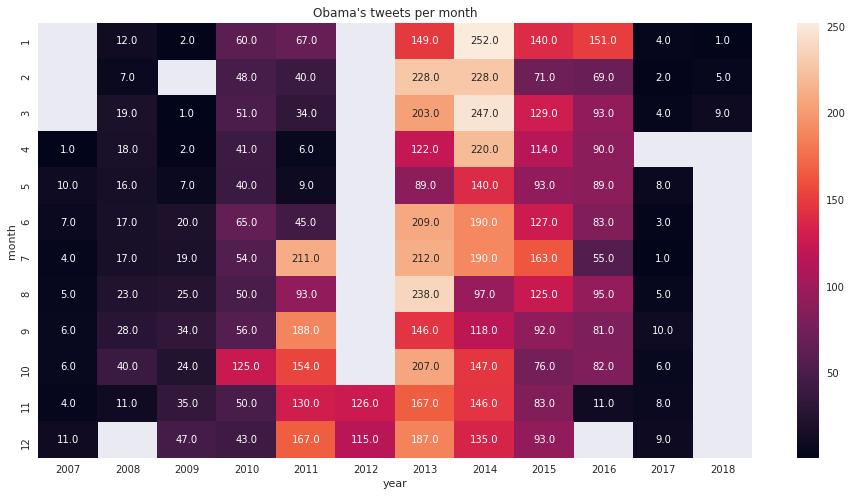

In [24]:
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(obama_vis, annot=True, fmt='.1f')
plt.title('Obama\'s tweets per month')

#### 2008-12, 2009-02, 2012-01 to 2012-10, 2016-12, 2017-04 have no tweets, check the dates manual and scrape them
- 2008-12: https://twitter.com/search?src=typd&q=from%3ABarackObama%20since%3A2008-12-01%20until%3A2009-01-01
- 2009-02: https://twitter.com/search?src=typd&q=from%3ABarackObama%20since%3A2009-02-01%20until%3A2009-03-01
- 2012-01 to 2012-10: https://twitter.com/search?src=typd&q=from%3ABarackObama%20since%3A2012-01-01%20until%3A2012-11-01
- 2016-12: https://twitter.com/search?src=typd&q=from%3ABarackObama%20since%3A2016-12-01%20until%3A2017-01-01
- 2017-04: https://twitter.com/search?src=typd&q=from%3ABarackObama%20since%3A2017-04-01%20until%3A2017-05-01

In [25]:
obama_raw[(obama_raw['Date'] > '2012-01-01') & (obama_raw['Date'] < '2012-11-01')]

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags


In [26]:
# For 2012-01 to 2012-06
obama2012_01to06 = pd.read_csv('obama201206.csv', sep='|')
print_head_tail(obama2012_01to06)

,Content,Date,Likes,Replies,Retweets,Time,TweetID
0,"Today, we honor those who loved their country ...",2012-05-28,872,571,5544,16:35:12,207148023246106626
1,2012 is heating up—say you’re in. http://OFA.B...,2012-05-26,193,331,360,14:54:08,206397816623468545
2,Share what change means to you: http://OFA.BO/...,2012-05-30,167,403,231,01:12:40,207640637913300992
3,Shadowy conservative groups have pledged $1 bi...,2012-05-31,233,537,651,01:19:27,208004734282506241
4,What does change mean to you? Share your answe...,2012-05-27,221,486,355,22:23:49,206873370611036160
1474,2012 is here. Stand with President Obama in th...,2012-01-02,80,197,513,19:41:07,153923797572009984
1475,Thanks for being a member of this team in 2011...,2012-01-02,95,239,365,16:15:26,153872034559045634
1476,Still narrowing down your list of New Year's r...,2012-01-01,50,162,153,19:39:50,153561085054693377
1477,"From all of us on the campaign, thanks for an ...",2012-01-01,153,385,814,05:03:43,153340602384252928
1478,Who would you bring to #DinnerWithBarack? Just...,2012-01-01,38,334,130,00:06:43,153265860096688128


In [27]:
# For 2012-06 to 2012-11
obama2012_06to11 = pd.read_csv('obama201211.csv', sep='|')
print_head_tail(obama2012_06to11)

,Content,Date,Likes,Replies,Retweets,Time,TweetID
0,"President Obama: ""I will work with anybody fro...",2012-11-05,529,270,2216,22:05:11,265575513337257984
1,President Obama ordered the raid on Osama bin ...,2012-11-05,982,533,2739,23:20:17,265594411751178240
2,Boss hug:,2012-11-05,2407,300,4344,19:23:35,265534843574693888
3,"""Are we ready to move forward, Ohio?"" —Jay Z i...",2012-11-05,486,147,1433,21:19:48,265564091861581824
4,Help win tomorrow by calling voters in key sta...,2012-11-05,383,171,970,20:41:33,265554467154444288
23,"President Obama: ""Our economy is stronger when...",2012-11-05,241,92,1058,21:49:35,265571587028303873
24,"""If you want to make your voice heard, you've ...",2012-11-05,235,79,1186,21:02:03,265559628325199872
25,"President Obama in Ohio: ""Another $5 trillion ...",2012-11-05,179,139,622,22:57:07,265588584390729729
26,"Obama: ""The auto worker who's back on the job ...",2012-11-05,189,108,612,22:06:59,265575968536666113
27,"President Obama speaking to a crowd of 18,000 ...",2012-11-05,201,126,564,18:59:23,265528757052387329


In [28]:
# Combine all these parts
obama_various = pd.concat([obama2012_01to06, obama2012_06to11])
print_overview(obama_various)

Shape:  (1507, 7) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 0 to 27
Data columns (total 7 columns):
Content     1507 non-null object
Date        1507 non-null object
Likes       1507 non-null int64
Replies     1507 non-null int64
Retweets    1507 non-null int64
Time        1507 non-null object
TweetID     1507 non-null int64
dtypes: int64(4), object(3)
memory usage: 94.2+ KB
None


In [29]:
obama_various.drop_duplicates(inplace=True)
print_overview(obama_various)

Shape:  (1507, 7) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 0 to 27
Data columns (total 7 columns):
Content     1507 non-null object
Date        1507 non-null object
Likes       1507 non-null int64
Replies     1507 non-null int64
Retweets    1507 non-null int64
Time        1507 non-null object
TweetID     1507 non-null int64
dtypes: int64(4), object(3)
memory usage: 94.2+ KB
None


In [30]:
print_head_tail(obama_various)

,Content,Date,Likes,Replies,Retweets,Time,TweetID
0,"Today, we honor those who loved their country ...",2012-05-28,872,571,5544,16:35:12,207148023246106626
1,2012 is heating up—say you’re in. http://OFA.B...,2012-05-26,193,331,360,14:54:08,206397816623468545
2,Share what change means to you: http://OFA.BO/...,2012-05-30,167,403,231,01:12:40,207640637913300992
3,Shadowy conservative groups have pledged $1 bi...,2012-05-31,233,537,651,01:19:27,208004734282506241
4,What does change mean to you? Share your answe...,2012-05-27,221,486,355,22:23:49,206873370611036160
23,"President Obama: ""Our economy is stronger when...",2012-11-05,241,92,1058,21:49:35,265571587028303873
24,"""If you want to make your voice heard, you've ...",2012-11-05,235,79,1186,21:02:03,265559628325199872
25,"President Obama in Ohio: ""Another $5 trillion ...",2012-11-05,179,139,622,22:57:07,265588584390729729
26,"Obama: ""The auto worker who's back on the job ...",2012-11-05,189,108,612,22:06:59,265575968536666113
27,"President Obama speaking to a crowd of 18,000 ...",2012-11-05,201,126,564,18:59:23,265528757052387329


In [31]:
duplicates_overview(obama_various)

,Content,Date,Likes,Replies,Retweets,Time,TweetID


In [32]:
obama_various = drop_duplicated_feature(obama_various, 'TweetID')
print_overview(obama_various)

Shape:  (1507, 7) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 15 to 1478
Data columns (total 7 columns):
Content     1507 non-null object
Date        1507 non-null object
Likes       1507 non-null int64
Replies     1507 non-null int64
Retweets    1507 non-null int64
Time        1507 non-null object
TweetID     1507 non-null int64
dtypes: int64(4), object(3)
memory usage: 94.2+ KB
None


#### Standardize the format

In [33]:
obama_various[['TweetID']] = obama_various[['TweetID']].astype(int)
obama_various['Timezone'] = 'GMT'
obama_various['Username'] = 'BarackObama'
obama_various['Hashtags'] = obama_various['Content'].str.findall(r'#\w+')
print_head_tail(obama_various)

,Content,Date,Likes,Replies,Retweets,Time,TweetID,Timezone,Username,Hashtags
15,FACT: Thanks to the President’s health care la...,2012-11-05,530,220,3276,23:55:36,265603301356224512,GMT,BarackObama,[#Forward]
6,FACT: The first bill President Obama signed in...,2012-11-05,618,157,3276,23:50:38,265602051214548992,GMT,BarackObama,[]
5,"Under President Obama, we’ve accomplished a lo...",2012-11-05,1721,159,4077,23:42:51,265600090532618240,GMT,BarackObama,[]
1,President Obama ordered the raid on Osama bin ...,2012-11-05,982,533,2739,23:20:17,265594411751178240,GMT,BarackObama,[]
25,"President Obama in Ohio: ""Another $5 trillion ...",2012-11-05,179,139,622,22:57:07,265588584390729729,GMT,BarackObama,[]
1474,2012 is here. Stand with President Obama in th...,2012-01-02,80,197,513,19:41:07,153923797572009984,GMT,BarackObama,[]
1475,Thanks for being a member of this team in 2011...,2012-01-02,95,239,365,16:15:26,153872034559045634,GMT,BarackObama,[]
1476,Still narrowing down your list of New Year's r...,2012-01-01,50,162,153,19:39:50,153561085054693377,GMT,BarackObama,[#DonateAResolution]
1477,"From all of us on the campaign, thanks for an ...",2012-01-01,153,385,814,05:03:43,153340602384252928,GMT,BarackObama,[#Obama2012]
1478,Who would you bring to #DinnerWithBarack? Just...,2012-01-01,38,334,130,00:06:43,153265860096688128,GMT,BarackObama,[#DinnerWithBarack]


In [34]:
obama_various.columns.values

array(['Content', 'Date', 'Likes', 'Replies', 'Retweets', 'Time',
       'TweetID', 'Timezone', 'Username', 'Hashtags'], dtype=object)

In [35]:
obama_various = obama_various[['TweetID','Date','Time','Timezone','Username','Content','Replies','Retweets','Likes','Hashtags']]
print_head_tail(obama_various)

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags
15,265603301356224512,2012-11-05,23:55:36,GMT,BarackObama,FACT: Thanks to the President’s health care la...,220,3276,530,[#Forward]
6,265602051214548992,2012-11-05,23:50:38,GMT,BarackObama,FACT: The first bill President Obama signed in...,157,3276,618,[]
5,265600090532618240,2012-11-05,23:42:51,GMT,BarackObama,"Under President Obama, we’ve accomplished a lo...",159,4077,1721,[]
1,265594411751178240,2012-11-05,23:20:17,GMT,BarackObama,President Obama ordered the raid on Osama bin ...,533,2739,982,[]
25,265588584390729729,2012-11-05,22:57:07,GMT,BarackObama,"President Obama in Ohio: ""Another $5 trillion ...",139,622,179,[]
1474,153923797572009984,2012-01-02,19:41:07,GMT,BarackObama,2012 is here. Stand with President Obama in th...,197,513,80,[]
1475,153872034559045634,2012-01-02,16:15:26,GMT,BarackObama,Thanks for being a member of this team in 2011...,239,365,95,[]
1476,153561085054693377,2012-01-01,19:39:50,GMT,BarackObama,Still narrowing down your list of New Year's r...,162,153,50,[#DonateAResolution]
1477,153340602384252928,2012-01-01,05:03:43,GMT,BarackObama,"From all of us on the campaign, thanks for an ...",385,814,153,[#Obama2012]
1478,153265860096688128,2012-01-01,00:06:43,GMT,BarackObama,Who would you bring to #DinnerWithBarack? Just...,334,130,38,[#DinnerWithBarack]


In [36]:
obama_various.to_csv('obamaVarious.csv', index=False, sep='|')

In [37]:
obama_various = pd.read_csv('obamaVarious.csv', sep='|')
print_overview(obama_various)

Shape:  (1507, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 10 columns):
TweetID     1507 non-null int64
Date        1507 non-null object
Time        1507 non-null object
Timezone    1507 non-null object
Username    1507 non-null object
Content     1507 non-null object
Replies     1507 non-null int64
Retweets    1507 non-null int64
Likes       1507 non-null int64
Hashtags    1507 non-null object
dtypes: int64(4), object(6)
memory usage: 117.8+ KB
None


In [38]:
obama = pd.concat([obama_various, obama_raw])
print_overview(obama)

Shape:  (10600, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10600 entries, 0 to 2304
Data columns (total 10 columns):
TweetID     10600 non-null int64
Date        10600 non-null object
Time        10600 non-null object
Timezone    10600 non-null object
Username    10600 non-null object
Content     10600 non-null object
Replies     10600 non-null int64
Retweets    10600 non-null int64
Likes       10600 non-null int64
Hashtags    5902 non-null object
dtypes: int64(4), object(6)
memory usage: 910.9+ KB
None


In [39]:
obama.drop_duplicates(inplace=True)
print_overview(obama)

Shape:  (10600, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10600 entries, 0 to 2304
Data columns (total 10 columns):
TweetID     10600 non-null int64
Date        10600 non-null object
Time        10600 non-null object
Timezone    10600 non-null object
Username    10600 non-null object
Content     10600 non-null object
Replies     10600 non-null int64
Retweets    10600 non-null int64
Likes       10600 non-null int64
Hashtags    5902 non-null object
dtypes: int64(4), object(6)
memory usage: 910.9+ KB
None


In [40]:
duplicates_overview(obama)

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags


In [41]:
repeated_tweets = list(set(duplicates_overview(obama)['TweetID'].tolist()))
repeated_tweets

[]

In [42]:
obama = drop_duplicated_feature(obama)
print_overview(obama)

Shape:  (10600, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10600 entries, 0 to 2304
Data columns (total 10 columns):
TweetID     10600 non-null int64
Date        10600 non-null object
Time        10600 non-null object
Timezone    10600 non-null object
Username    10600 non-null object
Content     10600 non-null object
Replies     10600 non-null int64
Retweets    10600 non-null int64
Likes       10600 non-null int64
Hashtags    5902 non-null object
dtypes: int64(4), object(6)
memory usage: 910.9+ KB
None


In [43]:
obama[obama['TweetID'].isin(repeated_tweets)]

,TweetID,Date,Time,Timezone,Username,Content,Replies,Retweets,Likes,Hashtags


In [44]:
obama.to_csv('obama.csv', index=False, sep='|')

In [45]:
obama = pd.read_csv('obama.csv', sep='|', lineterminator='\n')
print_overview(obama)

Shape:  (10600, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 10 columns):
TweetID     10600 non-null int64
Date        10600 non-null object
Time        10600 non-null object
Timezone    10600 non-null object
Username    10600 non-null object
Content     10600 non-null object
Replies     10600 non-null int64
Retweets    10600 non-null int64
Likes       10600 non-null int64
Hashtags    5902 non-null object
dtypes: int64(4), object(6)
memory usage: 828.2+ KB
None


#### Obama data is all set
---